##### The linear regression model assumes that the response Y is quantitative. In many situations, the response is instead qualitative. 
##### Qualitative variables are often referred to as categorical. Predicting qualitative responses is known as classification.
##### The methods used for classification first predict the probability that the observation belongs to each of the categories of a qualitative variable, as the basis for making the classifictaion.
##### There are many possible classification techniques, or classifiers, that one might use to predict a qualitative response. The widely used classifiers are:
* Logistic Regression
* Linear Discriminant Analysis
* Quadratic Discriminant Analysis.
* Naive Bayes.
* K-Nearest Neighbors.

#### The Stock Market Data
##### In this lab we will examine the Smarket data, which is part of the ISLP library. The data consists of percentage returns for the S&P 500 stock index over 1,250 days, from the beginning of 2001 until the end of 2005.
##### For each date, we have recorded the percentage returns for each of the five previous trading days, Lag1 through Lag5. We have also recorded Volume (The number of shares traded on the previous day, in billions), Today(the percentage return on the date in question) and Direction( whether the market was Up or Down on this date).

In [2]:
!pip install numpy pandas matplotlib statsmodels

In [3]:
!pip install ISLP


In [4]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import(ModelSpec as MS, summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
#Load the SMarket data
Smarket = load_data("Smarket")
Smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [6]:
Smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [7]:
#We compute the correlation matrix using corr() method for data frames, which produces a matrix that contains all of the pairwise correlations among the variables.
#The pandas lib does not report a corr for the Direction variable because it is qualitative
minusDirection=Smarket.columns.drop("Direction")
Smarket[minusDirection].corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


<Axes: >

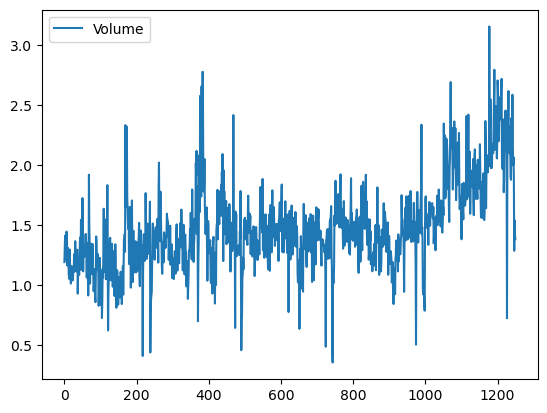

In [8]:
Smarket.plot(y="Volume")
#The only substantial correlation is between Year and Volume. By plotting the data we see that Volume is increasing over time.
#meaning that the average number of shares traded daily increased from 2001 to 2005

#### Logistic Regression

In [9]:
# We will fit a logistic regression model in order to predict Direction using Lag1 through Lag5 and volume.
#The sm.GLM() fit generalized linear models, that includes logistic regression
#sm.Logit() fits a logistic regression model directly
#The syntax of sm.GLM() is similar to sm.OLS() except that we must pass in the argument family=sm.families.Binomial() inorder to tell the statsmodels to run a logistic regression rather than some other type of glm
allvars= Smarket.columns.drop(["Today", "Direction", "Year"])
design= MS(allvars)
X= design.fit_transform(Smarket)
y= Smarket.Direction == "Up"
glm = sm.GLM(y, X, family= sm.families.Binomial())
results = glm.fit()
summarize(results)
#the smallest p-value here is associated with Lag1. the negative coeff for this predictor suggests that if the market had a positive return yesterday, then it is less likely to go up today
#a p-value of 0.15 is still relatively large and so there is no clear evidence of real association between Lag1 and Direction

,coef,std err,z,P>|z|
intercept,-0.1260,0.241,-0.523,0.601
Lag1,-0.0731,0.050,-1.457,0.145
Lag2,-0.0423,0.050,-0.845,0.398
Lag3,0.0111,0.050,0.222,0.824
Lag4,0.0094,0.050,0.187,0.851
Lag5,0.0103,0.050,0.208,0.835
Volume,0.1354,0.158,0.855,0.392


In [10]:
#coeff of the fitted model
results.params

intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

In [11]:
#pvalues
results.pvalues

intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64

In [12]:
#The predict() method of the results can be used to predict the probability that the market will go up, given the values of the predictors. Returns predictions on the probability scale
probs = results.predict()
probs[:10]

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

In [13]:
#in order to make a prediction as to whether the market will go up or down on a particular day, we must convert these probabilities into class labels Up or Down
labels = np.array(["Down"] * 1250)
labels[probs>0.5] = "Up"
labels

array(['Up', 'Down', 'Down', ..., 'Up', 'Up', 'Up'], dtype='<U4')

In [14]:
# confusion_table is adapted from a similar function module sklearn.metrics
#the confusion_table summarizes the predictions showing how many observations were correctly or incorrectly classified
#the confusion_table takes as first argument the predicted labels, and second the true labels
confusion_table(labels, Smarket.Direction)

Truth,Down,Up
Predicted,,
Down,145,141
Up,457,507


In [15]:
#the model correctly predicted that the market would go up on 507 days and it will go down on 145 days totalling to 652 correct predictions
#the np.mean() can be used to compute the fraction of days for which the prediction was correct
(507+145)/1250, np.mean(labels== Smarket.Direction)

#in this case, logistic regression correctly predicted the movement of the market 52.2% of the time
#we trained and tested the model on the same set of 1250 observations therefore 47.8% is the training error rate

(0.5216, 0.5216)

In [16]:
#training error rate tends to underestimate the test error rate
#In order to better assess the accuracy of the log reg model in this setting, we can fit the model using part of the data and then examine how well it predicts the held out data
#first create a Boolean vector corresponding to the observations from 2001 thro 2004
train = (Smarket.Year < 2005)
Smarket_train = Smarket.loc[train]
Smarket_test = Smarket.loc[~train]
Smarket_test.shape

(252, 9)

In [17]:
# We now fit a logistic regression model using only the subset of the observations that correspond to dates before 2005. We then obtain predicted
# probabilities of the stock market going up for each of the days in our test set — that is, for the days in 2005
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train, X_train, family= sm.families.Binomial())
results= glm_train.fit()
probs = results.predict(exog=X_test)
probs

998     0.528220
999     0.515669
1000    0.522652
1001    0.513854
1002    0.498334
          ...   
1245    0.483637
1246    0.506048
1247    0.516658
1248    0.516124
1249    0.508072
Length: 252, dtype: float64

In [18]:
predictions =(probs > 0.5).astype(int)


In [19]:
#Evaluate performance
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.4801587301587302

In [20]:
#we compare the predictions for 2005 to the actual movements of the market over that time period
D = Smarket.Direction
L_train, L_test = D.loc[train], D.loc[~train]

In [21]:
#Now we threshold the fitted prob at 50% to form our predicted labels
labels= np.array(["Down"] * 252)
labels[probs>0.5] = "Up"
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,77,97
Up,34,44


In [22]:
#the test accuracy is about 48% while the error rate is about 52%
np.mean(labels==L_test), np.mean(labels!=L_test)

(0.4801587301587302, 0.5198412698412699)

In [23]:
#Refit the logistic regression using just Lag1 and Lag2 which seemed to have the highest predictive power in the original logi reg model
model= MS(["Lag1", "Lag2"]).fit(Smarket)
X= model.transform(Smarket)
X_train, X_test = X.loc[train], X.loc[~train]
glm_train= sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm_train.fit()
probs= results.predict(exog=X_test)
labels= np.array(["Down"] * 252)
labels[probs>0.5] = "Up"
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [24]:
#lets evaluate the overrall accuracy as well as the accuracy within the days when logistic regression predicts an increase
(35 + 106)/252, 106/(106+76)
#56% of the daily movts have been correctly predicted
#the conf matrix shows that on days when logistic reg predicts an increase in the market, it has a 58% accuracy rate. This suggest a possible trading strategy of buying on days when the model predicts an increasing market and avoiding trades on days when a decease is predicted

(0.5595238095238095, 0.5824175824175825)

In [25]:
#Suppose we want to predict the returns associated with particular values of Lag1 and Lag2
newdata = pd.DataFrame({"Lag1":[1.2, 1.5],
                      "Lag2": [1.1, -0.8]})
newX = model.transform(newdata)
results.predict(newX)

0    0.479146
1    0.496094
dtype: float64

#### Linear Discriminant Analysis
##### LDA finds linear combinations of features that maximize separation between classes (based on means and shared covariance)

In [26]:
#we fit the model using only the observations before 2005
lda = LDA(store_covariance = True)

In [27]:
#since the LDA estimator automatically adds an intercept, we should remove the column corresponding to the intercept in both X_train and X_test
X_train, X_test = [M.drop(columns=["intercept"]) for M in [X_train, X_test]]
lda.fit(X_train, L_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [28]:
#Having fit the model, we extract the means in the two classes with the means_ attribute.
#These are average of each predictor within each class and are used by LDA as etimates of µk.
lda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [29]:
#the estimated prior probabilities are stored in the priors_ attribute.
#The package sklearn typically uses this trailing _ to denote a quantity estimated when using the fit() method.
#We can be sure of which entry corresponds to which label by looking at the classes_ attribute
lda.classes_

array(['Down', 'Up'], dtype='<U4')

In [30]:
lda.priors_

array([0.49198397, 0.50801603])

In [31]:
#The linear discriminant vectors can be found in the scallings_ attribute.
lda.scalings_

array([[-0.64201904],
       [-0.51352928]])

In [32]:
#These values above provide the linear combination of Lag1 and Lag2 that are used to form  the LDA decision rule.
#They are multipliers of the elements of X=x. if -0.64 x Lag1 - 0.51 x Lag2 is large, then the LDA classifier will predict a market increase and if its small then the LDA classifier will predict a market decline
lda_pred = lda.predict(X_test) #returns the predicted class labels (0 or 1 in binary classification). The decision is based on the highest posterior probability
lda_pred

array(['Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down',
       'Down', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down',
       'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Down', 'Up',
       'Up', 'Up', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down',
       'Down', 'Up', 'Up', 'Down', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Down', 'Down', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Down', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down',
       'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 

In [33]:
#As we observed in our comparisons of classification methods, the LDA and Logistic regression predictions are almost identical
confusion_table(lda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [34]:
#we can also estimate the probability of each class for each point in a training set.
#Applying a 50% threshold to the posterior probabilities of being in class one allows us to recreate the predictions contained in lda_pred
lda_prob = lda.predict_proba(X_test)
np.all(np.where(lda_prob[:,1] >=0.5, "Up", "Down")==lda_pred)

True

In [35]:
#Above we used the np.where() that creates an array with value "Up" for indices where the second column of lda_prob(the estimated posterior probability of "Up") is greater than 0.5.
#For problems with more than two classes the labels are chosen as the class whose posterior prob is the highest
np.all([lda.classes_[i] for i in np.argmax(lda_prob, 1)]==lda_pred)

True

In [36]:
#we can use a posterior prob threshold other than 50% in order to make predictions.
#Suppose that we wish to predict a market decrease only if we are certain that the market will indeed decrease on that day, say the posterior prob is atleast 90%.
#We know that the first column of lda_prob corresponds to the label Down after having checked the classes_attribute, hence we use the column index 0 rather than 1 as above
np.sum(lda_prob[:, 0]>0.9)
#No days in 2005 meet this threshold

0

#### Quadratic Discriminant Analysis

In [37]:
# We will now fit a QDA model to the Smarket data. The syntax is similar to LDA()
qda= QDA(store_covariance=True)
qda.fit(X_train, L_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [38]:
#lets compute the means_ and priors_
qda.means_, qda.priors_

(array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]),
 array([0.49198397, 0.50801603]))

In [39]:
#the QDA() classifier will estimate one covariance per class
qda.covariance_[0] #estimated covariance in the first class

#The output contains the group means, but not the coefficients of the linear discriminants, because the QDA classifier involves a quadratic, rather than a linear function of the predictors

array([[ 1.50662277, -0.03924806],
       [-0.03924806,  1.53559498]])

In [40]:
#The predict() function works exactly the same fashion as for LDA
qda_pred= qda.predict(X_test)
confusion_table(qda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,30,20
Up,81,121


In [41]:
#the np.mean() can be used to compute the fraction of days for which the prediction was correct
np.mean(qda_pred==L_test)

#QDA predictions are accurate 60% of the time even though the 2005 data was not used to fit the model.
#This suggested that the quadratic form assumed by QDA may capture the true relatioship more accurately than the linear forms assumed by the LDA and logistic regression.


0.5992063492063492

#### Naive Bayes

In [42]:
#The syntax is similar to that of LDA() and QDA().
#By default, this implementation GaussianNB() of the naive Bayes classifier modeld each quantitative feature using a Gaussian distribution.
NB = GaussianNB()
NB.fit(X_train, L_train)

GaussianNB()

In [43]:
#lets get the classes_
NB.classes_

array(['Down', 'Up'], dtype='<U4')

In [44]:
#the class prior probabilities are stored in the class_prior_
NB.class_prior_

array([0.49198397, 0.50801603])

In [45]:
#the parameters of the features can be found in the theta_ and var_ attributes.
#The number of rows== number of classes
#the number of columns== number of features
NB.theta_

#we see below that the mean for feature Lag1 in the Down class is 0.043

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [46]:
# Lag1 Down variance is 1.503
NB.var_

array([[1.50355429, 1.53246749],
       [1.51401364, 1.48732877]])

In [47]:
# we get the names of the attributes
X_train[L_train== "Down"].mean() 
#L_train contains labels(Up or Down) and the X_train contains features(Lag1 and Lag2). Therefore we filter the X_train to only rows where the label is Down

Lag1    0.042790
Lag2    0.033894
dtype: float64

In [48]:
X_train[L_train == "Down"].var(ddof=0)

Lag1    1.503554
Lag2    1.532467
dtype: float64

In [49]:
#The GaussianNB() calculates variances using the 1/n formula
nb_labels= NB.predict(X_test)
confusion_table(nb_labels, L_test)

#Naive Bayes performs well on these data, with accurate predictions over 59% of the time. Slightly worse than QDA but much better than LDA

Truth,Down,Up
Predicted,,
Down,29,20
Up,82,121


In [50]:
#As for LDA, the predict_proba() method estimates the probabiltity that each observation belongs to a particular class
NB.predict_proba(X_test)[:5]

array([[0.4873288 , 0.5126712 ],
       [0.47623584, 0.52376416],
       [0.46529531, 0.53470469],
       [0.47484469, 0.52515531],
       [0.49020587, 0.50979413]])

#### K-Nearest Neighbors

In [51]:
#we will perform KNN using the KNeighborsClassifier() function
#As is the case for LDA and QDA, we fit the classifier using the fit method and new predictions are formed using the predict() method of the object returned by fit()
knn1= KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, L_train)
knn1_pred= knn1.predict(X_test)
confusion_table(knn1_pred, L_test)

Truth,Down,Up
Predicted,,
Down,43,58
Up,68,83


In [52]:
(83+43)/252, np.mean(knn1_pred==L_test)

#The results using K=1 are not very good, since only 50% of the observations are correctly predicted.
#It may be that K=1 results in an overly-flexible fit to the data.

(0.5, 0.5)

In [53]:
#Lets repeat the analysis using K=3
knn3= KNeighborsClassifier(n_neighbors=3)
knn3_pred=knn3.fit(X_train, L_train).predict(X_test)
np.mean(knn3_pred==L_test)

#The results have improved slightly. But increasing K further provides no further improvements.
#It appears that for these data, and this train/test split, QDA gives the best results of the methods we have examined

0.5317460317460317

In [54]:
#As an example we will apply the KNN approach to the Caravan data set, which is part of the ISLP library. This data set includes 85 predictors that measure demographic characteristics for 5,822 individuals.
#The response variable is Purchase, which indicates whether or not a given individual purchases a caravan insurance policy. In this data set, only 6% of people purchased caravan insurance.

Caravan = load_data("Caravan")
Purchase = Caravan.Purchase
Purchase.value_counts() #returns the corresponding counts for each unique element

Purchase
No     5474
Yes     348
Name: count, dtype: int64

In [55]:
348/5822 # only 6% purchased

0.05977327378907592

In [56]:
# Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale
# A good way to handle this problem is to standardize the data so that all variables are given a mean of zero and SD of 1. Then all variables will be on a comparable scale
feature_df= Caravan.drop(columns=["Purchase"])
scaler = StandardScaler(with_mean=True, with_std=True, copy=True)
scaler.fit(feature_df)
X_std= scaler.transform(feature_df) 

In [57]:
##now every column of feature_std has a SD of 1 and mean of 0
feature_std = pd.DataFrame(X_std, columns= feature_df.columns)
feature_std.std()

MOSTYPE     1.000086
MAANTHUI    1.000086
MGEMOMV     1.000086
MGEMLEEF    1.000086
MOSHOOFD    1.000086
              ...   
AZEILPL     1.000086
APLEZIER    1.000086
AFIETS      1.000086
AINBOED     1.000086
ABYSTAND    1.000086
Length: 85, dtype: float64

In [58]:
#we use the train_test_split() to split observations into a test set containing 1000 observations and training set containing the remaining observations.
#The argument random_state = 0 ensures that we get the same split each time we rerun the code
(X_train,
X_test,
y_train,
y_test) = train_test_split(X_std, Purchase, test_size = 1000, random_state=0)

#we fit a KNN model
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1_pred = knn1.fit(X_train, y_train).predict(X_test)
np.mean(y_test != knn1_pred), np.mean(y_test != "No")

#The KNN error rate on the 1000 test observations is acout 11%. This may appear fairly good at first glance. However, since just over 6% of the customers purchased insurance, 
#We could get the error rate down to almost 6% by always predicting No regardless of the values of the predictors. This is known as the null rate

(0.111, 0.067)

In [59]:
#lets get the fraction of individuals that are correctly predicted to buy insurance
confusion_table(knn1_pred, y_test)

Truth,No,Yes
Predicted,,
No,880,58
Yes,53,9


In [60]:
9/(53+9) ## KNN with K=1 does far better than random guessing 9 or 14.5% actually do purchase the insurance

0.14516129032258066

#### Tuning Parameters
##### The number of neighbors in KNN is referred to as a tuning parameter also called a hyperparameter. We do not know a priori what value to use.
##### We therefore check how the classifier performs on test data as we vary the parameters.

In [61]:
for K in range(1,6):
    knn= KNeighborsClassifier(n_neighbors=K)
    knn_pred= knn.fit(X_train, y_train).predict(X_test)
    C = confusion_table(knn_pred, y_test)
    templ = ("K={0:d}: #predicted to rent:{1:>2}," + "# who did rent{2:d}, accuracy{3:.1%}")
    pred= C.loc["Yes"].sum()
    did_rent = C.loc["Yes", "Yes"]
    print(templ.format(K, pred, did_rent, did_rent / pred))

K=1: #predicted to rent:62,# who did rent9, accuracy14.5%
K=2: #predicted to rent: 6,# who did rent1, accuracy16.7%
K=3: #predicted to rent:20,# who did rent3, accuracy15.0%
K=4: #predicted to rent: 4,# who did rent0, accuracy0.0%
K=5: #predicted to rent: 7,# who did rent1, accuracy14.3%


In [62]:
logit = LogisticRegression(C=1e10, solver="liblinear")
logit.fit(X_train, y_train)
logit_pred= logit.predict_proba(X_test)
logit_labels = np.where(logit_pred[:,1] > 5, "Yes", "No")
confusion_table(logit_labels, y_test)

Truth,No,Yes
Predicted,,
No,933,67
Yes,0,0


In [63]:
#lets predict a purchase any time the predicted prob of purchase exceeds 0.25.
#we get better results: we predict that 29 people will purchase insurance and we are correct for about 31% of these people
logit_labels = np.where(logit_pred[:,1]> 0.25, "Yes", "No")
confusion_table(logit_labels, y_test)

Truth,No,Yes
Predicted,,
No,913,58
Yes,20,9


#### Linear and Poisson Regression on the Bikeshare Data
##### Here we fit linear and Poisson regression models to the Bikeshare data.
##### The response bikers measures the number of bike rentals per hour in Washington, DC in the period 2010-2012

In [64]:
Bike= load_data("Bikeshare")
Bike.shape, Bike.columns

((8645, 15),
 Index(['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
        'registered', 'bikers'],
       dtype='object'))

In [65]:
#we begin by fitting a linear regression model to the data
X= MS(["mnth","hr","workingday","temp","weathersit"]).fit_transform(Bike)
y= Bike["bikers"]
M_lm= sm.OLS(y,X).fit()
S1=summarize(M_lm)
S1

#In M_lm the first levels hr[0] and mnth[Jan] are treated as baseline values and so no coeff estimates are provided for them

,coef,std err,t,P>|t|
intercept,-68.6317,5.307,-12.932,0.000
mnth[Feb],6.8452,4.287,1.597,0.110
mnth[March],16.5514,4.301,3.848,0.000
mnth[April],41.4249,4.972,8.331,0.000
mnth[May],72.5571,5.641,12.862,0.000
mnth[June],67.8187,6.544,10.364,0.000
mnth[July],45.3245,7.081,6.401,0.000
mnth[Aug],53.2430,6.640,8.019,0.000
mnth[Sept],66.6783,5.925,11.254,0.000
mnth[Oct],75.8343,4.950,15.319,0.000


In [66]:
#Different coding for the variables hr and mnth
hr_encode = contrast("hr", "sum")
mnth_encode= contrast("mnth", "sum")
##Refitting again
X2= MS([mnth_encode, hr_encode, "workingday", "temp", "weathersit"]).fit_transform(Bike)
M2_lm= sm.OLS(y,X2).fit()
S2= summarize(M2_lm)
S2

,coef,std err,t,P>|t|
intercept,73.5974,5.132,14.340,0.000
mnth[Jan],-46.0871,4.085,-11.281,0.000
mnth[Feb],-39.2419,3.539,-11.088,0.000
mnth[March],-29.5357,3.155,-9.361,0.000
mnth[April],-4.6622,2.741,-1.701,0.089
mnth[May],26.4700,2.851,9.285,0.000
mnth[June],21.7317,3.465,6.272,0.000
mnth[July],-0.7626,3.908,-0.195,0.845
mnth[Aug],7.1560,3.535,2.024,0.043
mnth[Sept],20.5912,3.046,6.761,0.000


In [67]:
#The choice of coding really doesnt matter provided that we intepret the model output correctly
#we see that predictions from the linear model are the same regardless of coding
np.sum((M_lm.fittedvalues - M2_lm.fittedvalues)**2)

9.67021339774543e-21

In [68]:
#The sum of squared differences is zero. we can also see this using the np.allclose()
np.allclose(M_lm.fittedvalues,M2_lm.fittedvalues)

True

In [69]:
#To plot the coeff vs the mnt. we first obtain the coeffs from Jan to Nov then explicitly compute the coeff for Dec as the negative sum of all the other months
coeff_month= S2[S2.index.str.contains("mnth")]["coef"] #filters the dataframe S2 to extract rows where the index contains the substring "mnth" and then gets the coef of the filtered dataframe
coeff_month

mnth[Jan]     -46.0871
mnth[Feb]     -39.2419
mnth[March]   -29.5357
mnth[April]    -4.6622
mnth[May]      26.4700
mnth[June]     21.7317
mnth[July]     -0.7626
mnth[Aug]       7.1560
mnth[Sept]     20.5912
mnth[Oct]      29.7472
mnth[Nov]      14.2229
Name: coef, dtype: float64

In [70]:
#we then append Dec as the negative of the sum of all other months
months= Bike["mnth"].dtype.categories
coef_month= pd.concat([coeff_month,
                      pd.Series([-coeff_month.sum()],
                               index=["mnth[Dec]"])])
coef_month

mnth[Jan]     -46.0871
mnth[Feb]     -39.2419
mnth[March]   -29.5357
mnth[April]    -4.6622
mnth[May]      26.4700
mnth[June]     21.7317
mnth[July]     -0.7626
mnth[Aug]       7.1560
mnth[Sept]     20.5912
mnth[Oct]      29.7472
mnth[Nov]      14.2229
mnth[Dec]       0.3705
dtype: float64

Text(0, 0.5, 'Coefficient')

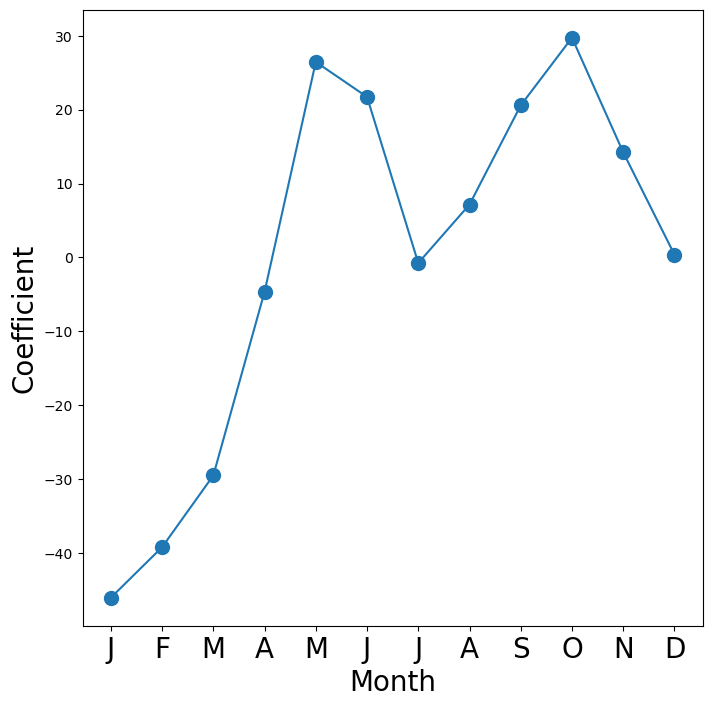

In [71]:
#Finaly to make the plot neater, we will just use the first letter of each month
fig_month, ax_month= subplots(figsize=(8,8))
x_month= np.arange(coef_month.shape[0])
ax_month.plot(x_month, coef_month, marker= "o", markersize=10)
ax_month.set_xticks(x_month)
ax_month.set_xticklabels([label[5] for label in coef_month.index], fontsize=20)
ax_month.set_xlabel("Month", fontsize=20)
ax_month.set_ylabel("Coefficient", fontsize=20)

Text(0, 0.5, 'Coefficient')

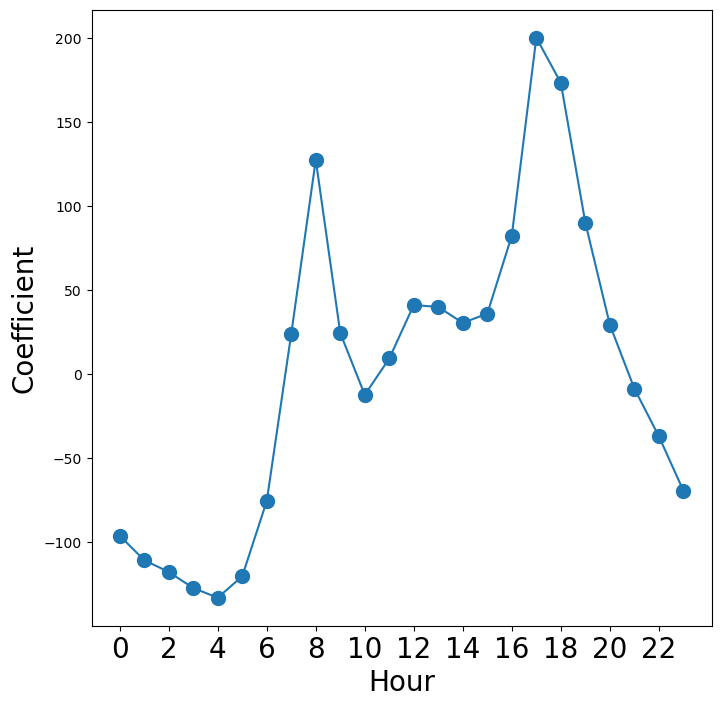

In [72]:
coef_hr= S2[S2.index.str.contains("hr")]["coef"]
coef_hr= coef_hr.reindex(["hr[{0}]".format(h) for h in range(23)])# ensure the Series has entries for all hours 0-22, even if some were missing in the original data
coef_hr = pd.concat([coef_hr,
                    pd.Series([-coef_hr.sum()], index=["hr[23]"])])
#we plot the hour plot
fig_hr, ax_hr= subplots(figsize=(8,8))
x_hr= np.arange(coef_hr.shape[0])
ax_hr.plot(x_hr, coef_hr, marker="o", markersize=10)
ax_hr.set_xticks(x_hr[::2])
ax_hr.set_xticklabels(range(24)[::2], fontsize=20)
ax_hr.set_xlabel("Hour", fontsize=20)
ax_hr.set_ylabel("Coefficient", fontsize=20)

#### Poisson Regression

In [73]:
#We fit a Poisson regression
M_pois= sm.GLM(y, X2, family=sm.families.Poisson()).fit()

In [74]:
#we can plot the coefficients associated with mnth and hr
S_pois = summarize(M_pois)
coef_month= S_pois[S_pois.index.str.contains("mnth")]["coef"]
coef_month = pd.concat([coef_month,
                      pd.Series([-coef_month.sum()], index=["mnth[Dec]"])])
coef_hr = S_pois[S_pois.index.str.contains("hr")]["coef"]
coef_hr= pd.concat([coef_hr,
                   pd.Series([-coef_hr.sum()], index=["hr[23]"])])

Text(0, 0.5, 'Coefficient')

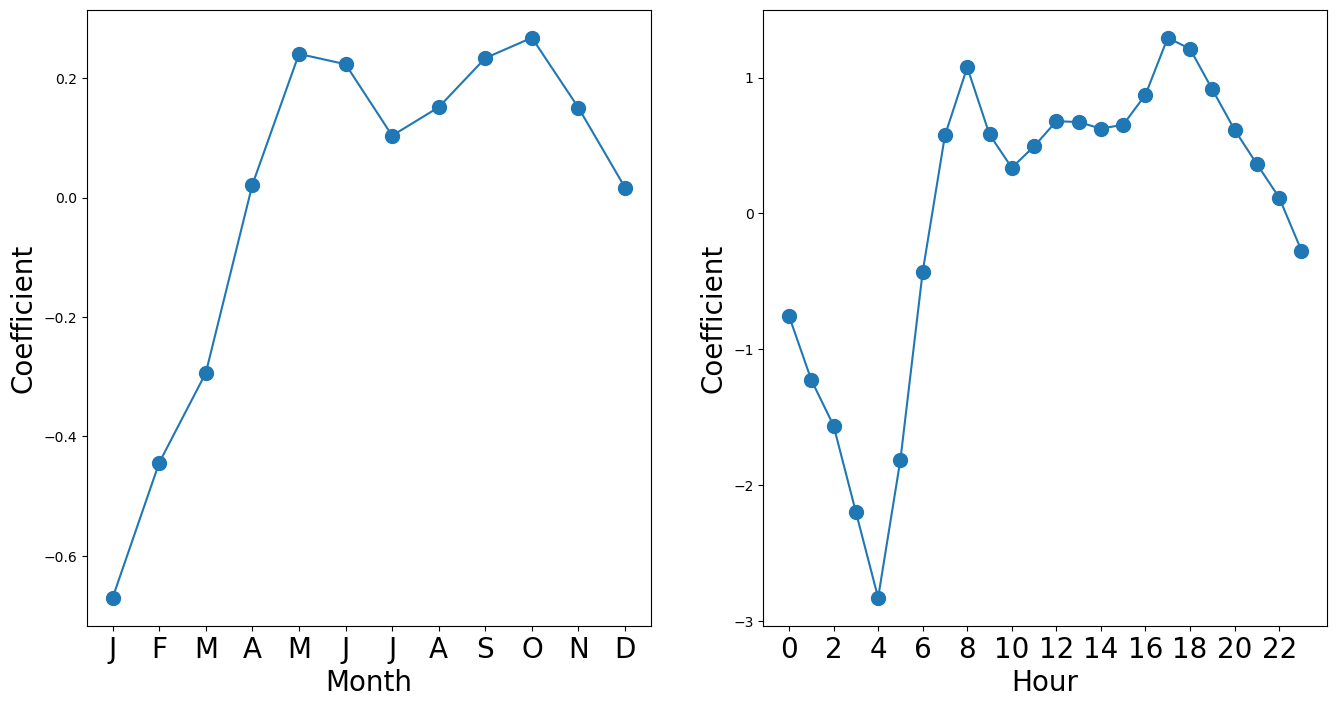

In [75]:
#plotting as before
fig_pois, (ax_month, ax_hr) = subplots(1,2, figsize=(16,8))
x_month = np.arange(len(coef_month))
ax_month.plot(x_month, coef_month, marker="o", ms=10)
ax_month.set_xticks(x_month)
ax_month.set_xticklabels([label[5] for label in coef_month.index], fontsize=20)
ax_month.set_xlabel("Month", fontsize=20)
ax_month.set_ylabel("Coefficient", fontsize=20)

x_hr = np.arange(coef_hr.shape[0])
ax_hr.plot(x_hr, coef_hr, marker="o", ms=10)
ax_hr.set_xticks(x_hr[::2])
ax_hr.set_xticklabels(range(24)[::2], fontsize=20)
ax_hr.set_xlabel("Hour", fontsize=20)
ax_hr.set_ylabel("Coefficient", fontsize=20)


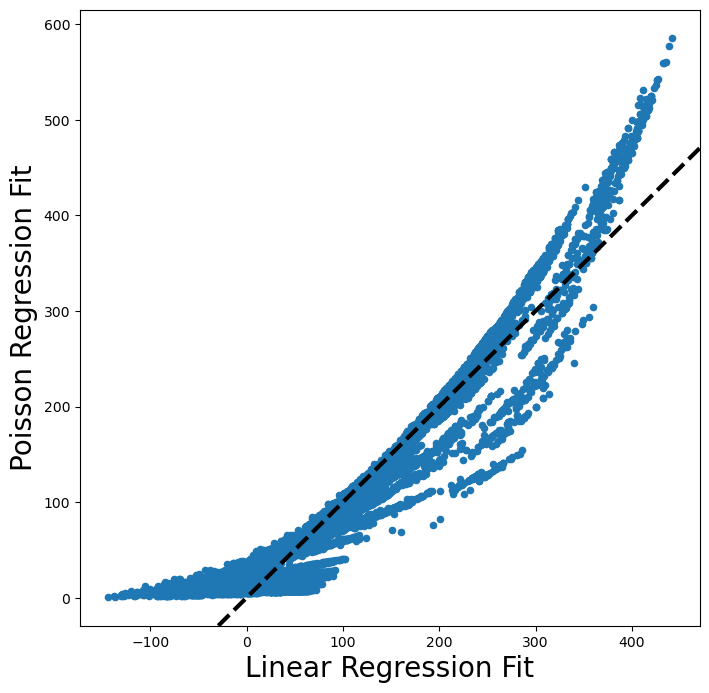

In [76]:
#We compare the fitted values of the two models
fig, ax = subplots(figsize=(8,8))
ax.scatter(M2_lm.fittedvalues,
          M_pois.fittedvalues,
          s=20)
ax.set_xlabel("Linear Regression Fit", fontsize=20)
ax.set_ylabel("Poisson Regression Fit", fontsize=20)
ax.axline([0,0], c="black", linewidth=3, linestyle="--", slope=1)

#Thw predictions from the Poisson regression model are correlated with those from the linear model; however, the former are non-negative

#### Question
##### This question should be answered using the Weekly data set which is part of the ISLP package. This data is similar in nature to the Smarket data, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010

##### a). Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [93]:
#numerical summary
Weekly = load_data("Weekly")
Weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [160]:
minusdirection= Weekly.columns.drop("Direction")
Weekly[minusdirection].corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


<Axes: >

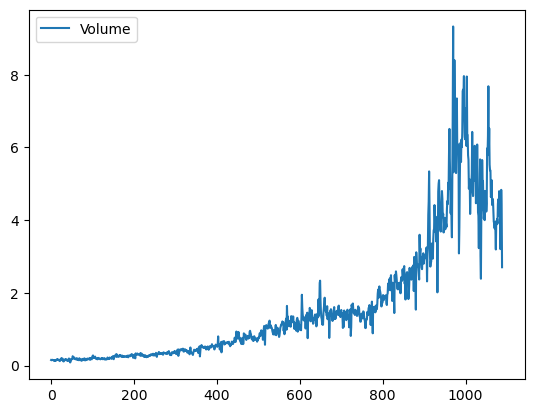

In [161]:
Weekly.plot(y="Volume")

#The volume has been increasing gradually for 21 years

##### b). Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant?, if so which ones?

In [162]:
y= Weekly.Direction == "Up"
variables= Weekly.columns.drop(["Year", "Today"])
design=MS(variables)
X= design.fit_transform(Weekly)
model= sm.GLM(y, X, family= sm.families.Binomial())
results= model.fit()
summarize(results)

C:\Users\colli\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\colli\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\colli\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\colli\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparat

,coef,std err,z,P>|z|
intercept,-2.756610e+01,32200.000,-1.000000e-03,0.999
Lag1,-9.548000e-15,7630.603,-1.250000e-18,1.000
Lag2,-8.549000e-15,7670.682,-1.110000e-18,1.000
Lag3,1.385000e-14,7623.094,1.820000e-18,1.000
Lag4,1.926000e-14,7630.736,2.520000e-18,1.000
Lag5,1.284000e-14,7607.569,1.690000e-18,1.000
Volume,1.616000e-13,10700.000,1.510000e-17,1.000
Direction[Up],5.513210e+01,36000.000,2.000000e-03,0.999


In [163]:
results.params, results.pvalues

(intercept       -2.756607e+01
 Lag1            -9.547918e-15
 Lag2            -8.548717e-15
 Lag3             1.385003e-14
 Lag4             1.926237e-14
 Lag5             1.283695e-14
 Volume           1.616207e-13
 Direction[Up]    5.513214e+01
 dtype: float64,
 intercept        0.999317
 Lag1             1.000000
 Lag2             1.000000
 Lag3             1.000000
 Lag4             1.000000
 Lag5             1.000000
 Volume           1.000000
 Direction[Up]    0.998777
 dtype: float64)

##### c). Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by the logistic regression.

In [164]:
probs= results.predict()
probs[:5]

array([1.06710843e-12, 1.06710843e-12, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00])

In [165]:
labels= np.array(["Down"]*1089)
labels[probs>0.5]= "Up"
labels

array(['Down', 'Down', 'Up', ..., 'Up', 'Up', 'Up'], dtype='<U4')

In [166]:
confusion_table(labels, Weekly.Direction)

Truth,Down,Up
Predicted,,
Down,484,0
Up,0,605


In [167]:
np.mean(labels==Weekly.Direction)

#The model makes 100% correct prediction which seems to be a problem

1.0

##### d). Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overral fraction of correct predictions for the held out data (that is, the data from 2009 and 2010)

In [171]:

train = (Weekly.Year < 2008) 
Weekly_train = Weekly.loc[train]
Weekly_test = Weekly.loc[~train]
Weekly_test.shape

model = MS(["Lag2"]).fit(Weekly)
# Convert Direction to numeric: "Up" -> 1, "Down" -> 0
y = (Weekly.Direction == "Up").astype(int)  # Convert to binary numeric format
X = model.transform(Weekly)

X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]

# Fit the GLM model with numeric dependent variable
glm_train = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)

# Convert probabilities back to labels
labels = np.array(["Down"] * len(y_test))
labels[probs > 0.5] = "Up"

# For confusion table, ensure y_test is in the same format as labels
y_test_labels = np.array(["Down"] * len(y_test))
y_test_labels[y_test == 1] = "Up"
confusion_table(labels, y_test_labels)

Truth,Down,Up
Predicted,,
Down,7,5
Up,65,79


In [153]:
np.mean(labels==y_test_labels)

#The model makes 55% correct predictions

0.5512820512820513

##### e). Reapeat (d) using LDA

In [172]:
lda= LDA(store_covariance=True)
X_train, X_test= [M.drop(columns=["intercept"]) for M in [X_train, X_test]]
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [173]:
lda.means_

array([[0.07329612],
       [0.27110173]])

In [174]:
lda.classes_

array([0, 1])

In [175]:
lda.priors_

array([0.44158628, 0.55841372])

In [176]:
lda.scalings_

array([[0.48766688]])

In [177]:
lda_predict = lda.predict(X_test)
lda_predict

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [180]:
confusion_table(lda_predict, y_test)

Truth,0,1
Predicted,,
0,6,5
1,66,79


In [181]:
np.mean(lda_predict==y_test)

0.5448717948717948

##### f). Repeat using QDA

In [182]:
Qda= QDA(store_covariance=True)
Qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [186]:
Qda.covariance_[0]

array([[3.54818021]])

In [188]:
Qda_pred = Qda.predict(X_test)
confusion_table(Qda_pred,y_test)

Truth,0,1
Predicted,,
0,0,0
1,72,84


In [189]:
np.mean(Qda_pred==y_test)

0.5384615384615384

##### g). Repeat using KNN with K=1

In [190]:
knn1= KNeighborsClassifier(n_neighbors=1)
knnPred= knn1.fit(X_train, y_train).predict(X_test)
confusion_table(knnPred, y_test)

Truth,0,1
Predicted,,
0,30,41
1,42,43


In [191]:
np.mean(knnPred==y_test)

#46% correct predictions, this is low compared to other models

0.46794871794871795

##### h). Repeat using naive Bayes

In [192]:
NB= GaussianNB()
NBPred=NB.fit(X_train, y_train).predict(X_test)
confusion_table(NBPred, y_test)

Truth,0,1
Predicted,,
0,0,0
1,72,84


In [193]:
np.mean(NBPred==y_test)

0.5384615384615384

##### i). Which of these methods appears to provide the best results on this data?

** The logistic regression method is the best as it provides 55% correct predictions and the worst is KNN classifier model that has 47% correct predictions

#### Question 2
##### In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

##### a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and 0 if mpg contains a value below its median. You can compute the median using the median() method of the dataframe. Note you may find it helpful to add a column mpg01 to the dta frame by assignment

In [195]:
Auto= load_data("Auto")
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [196]:
mpgMedian= Auto["mpg"].median()
mpgMedian

22.75

In [198]:
#create the mpg01 column : 1 if mpg>mpgMedian, else 0
Auto["mpg01"]= (Auto["mpg"]> mpgMedian).astype(int)
Auto[["mpg", "mpg01"]].head() #verify the result

,mpg,mpg01
name,,
chevrolet chevelle malibu,18.0,0
buick skylark 320,15.0,0
plymouth satellite,18.0,0
amc rebel sst,16.0,0
ford torino,17.0,0


##### b). Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings

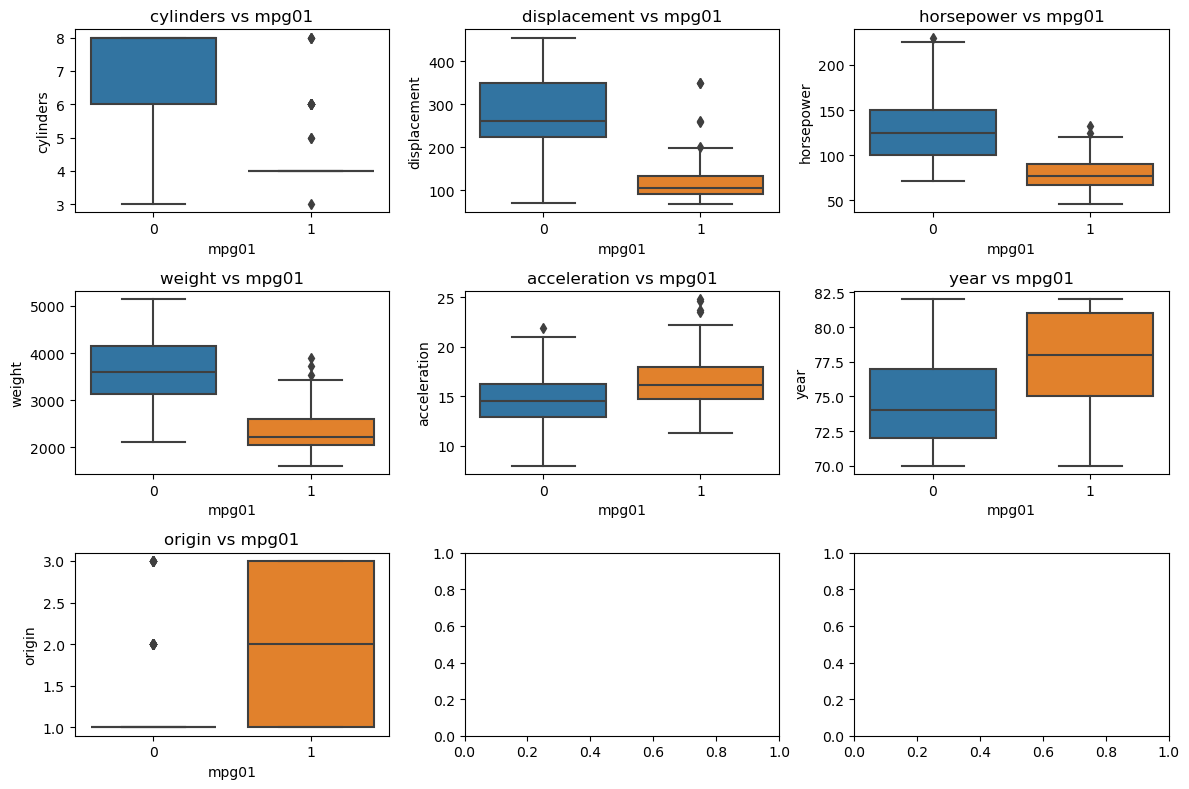

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt
#Drop non-predictor columns
predictors= Auto.columns.drop(["mpg", "mpg01"])

# Set up subplots for boxplots (for numerical features)
fig, axes = plt.subplots(3, 3, figsize=(12, 8))  # Create subplot grid once, outside the loop
axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to iterate

for i, feature in enumerate(predictors):
    if i < len(axes):  # Make sure we don't exceed the number of subplots
        sns.boxplot(x="mpg01", y=feature, data=Auto, ax=axes[i])  # Use the ax parameter
        axes[i].set_title(f"{feature} vs mpg01")

plt.tight_layout()
plt.show()


    

In [203]:
#To confirm, compute correlations between mpg01 and numerical predictors
correlations= Auto.corr()["mpg01"].abs().sort_values(ascending=False)
correlations

mpg01           1.000000
mpg             0.836939
cylinders       0.759194
weight          0.757757
displacement    0.753477
horsepower      0.667053
origin          0.513698
year            0.429904
acceleration    0.346822
Name: mpg01, dtype: float64

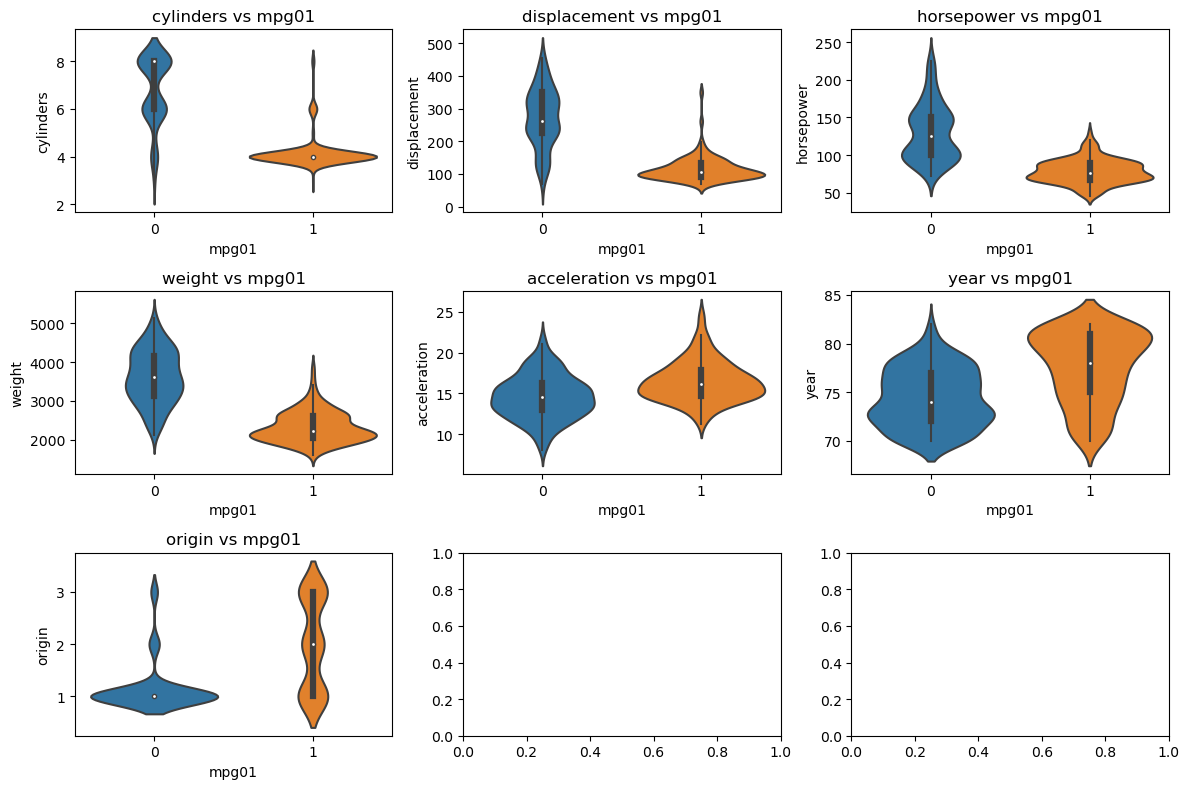

In [210]:
#Drop non-predictor columns
predictors= Auto.columns.drop(["mpg", "mpg01"])

# Set up subplots for boxplots (for numerical features)
fig, axes = plt.subplots(3, 3, figsize=(12, 8))  # Create subplot grid once, outside the loop
axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to iterate

for i, feature in enumerate(predictors):
    if i < len(axes):  # Make sure we don't exceed the number of subplots
        sns.violinplot(x="mpg01", y=feature, data=Auto, ax=axes[i])  # Use the ax parameter
        axes[i].set_title(f"{feature} vs mpg01")

plt.tight_layout()
plt.show()

#Scatter plot will just show two vertical clusters of points X=0 and x=1 and this makes it hard to see trends

##### c) Split the data into a training set and a test set

In [271]:
train=(Auto.year < 82)
sigFeature= ["cylinders", "weight", "horsepower", "displacement"]
#X=Auto[sigFeature]
y= Auto["mpg01"]==1
Auto_train= Auto.loc[train]
Auto_test = Auto.loc[~train]
Auto_test.shape

(30, 9)

##### d). Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01. What is the test error of the model obtained?

In [272]:
# Import MinMaxScaler if not already imported
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler with proper parameters
scaler = MinMaxScaler(feature_range=(0, 1))  # Default range is (0,1)

# Fit and transform the data
X = scaler.fit_transform(Auto[sigFeature])

# Split the data
X_train, X_test = X[train], X[~train]
y_train, y_test = y.loc[train], y.loc[~train]

# Fit LDA model
lda = LDA(store_covariance=True)
lda.fit(X_train, y_train)
lda_pred= lda.predict(X_test)
np.mean(lda_pred!=y_test)

0.0

In [273]:
# Import StandardScaler if not already imported
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()  # StandardScaler standardizes features by removing the mean and scaling to unit variance

# Fit and transform the data
X = scaler.fit_transform(Auto[sigFeature])

# Split the data
X_train, X_test = X[train], X[~train]
y_train, y_test = y.loc[train], y.loc[~train]

# Remove the "intercept" column if it exists
# Since X_train and X_test are NumPy arrays, we need a different approach
# Assuming "intercept" is a column in the original data, we need to find its index
if "intercept" in sigFeature:
    intercept_idx = sigFeature.index("intercept")
    # Remove the column by index
    X_train = np.delete(X_train, intercept_idx, axis=1)
    X_test = np.delete(X_test, intercept_idx, axis=1)

# Fit LDA model
lda = LDA(store_covariance=True)
lda.fit(X_train, y_train)

# Make predictions
lda_pred = lda.predict(X_test)

# Calculate error rate
error_rate = np.mean(lda_pred != y_test)
print(f"Error rate: {error_rate}")

Error rate: 0.0


##### f). Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01. What is the test error of the model obtained

In [274]:
glm_train = sm.GLM(y_train, X_train, family= sm.families.Binomial())
results= glm_train.fit()
probs = results.predict(exog=X_test)
labels= np.array([0]*30)
labels[probs>0.5]=1
accuracy_score(labels, y_test)

0.06666666666666667

In [275]:
np.mean(labels!=y_test)

0.9333333333333333

##### g). Perform naive Bayes on the training data in order to predict mpg01

In [276]:
# Create an instance of GaussianNB first
nb_model = GaussianNB()  # Create an instance of the GaussianNB class

# Then fit the model and make predictions
NBpred = nb_model.fit(X_train, y_train).predict(X_test)
confusion_table(NBpred, y_test)

Truth,True
Predicted,
True,30


In [277]:
np.mean(NBpred!=y_test)

0.0

##### Perform KNN on the training data, with several values of K

In [278]:
from sklearn.metrics import accuracy_score
k_values=[1,2,3,4,5,6]
test_errors=[]
for k in k_values:
    #train KNN
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    #predict on test set
    y_pred= knn.predict(X_test)
    #calculate test error(1-accuracy)
    error= 1-accuracy_score(y_test, y_pred)
    print(f"K= {k}: Test Error= {error:.4f}")

K= 1: Test Error= 0.0000
K= 2: Test Error= 0.0000
K= 3: Test Error= 0.0000
K= 4: Test Error= 0.0000
K= 5: Test Error= 0.0000
K= 6: Test Error= 0.0000
